## Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotnine as p9
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data1 = pd.read_csv("/Users/MannT/Desktop/Jup/Seguros/datos.csv") #Creacion de Dataframe a utilizar

In [3]:
data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data1.shape

(381109, 12)

In [5]:
data1 = data1.drop(["id"], axis = 1) #Eliminando columna id por datos no agrupables

In [6]:
data1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [8]:
data1.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Text(0.5, 1.0, 'Edades independiente de la decision')

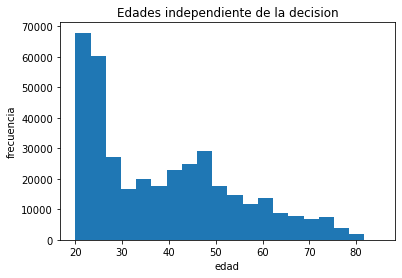

In [9]:
k = int(np.ceil(1+np.log2(381109))) #Agregando un valor a la variable k
plt.hist(data1["Age"], bins = k) #Especificando el campo a utilizar y especificando el valor del contenedor
plt.xlabel("edad") #Titulo columna X
plt.ylabel("frecuencia") #Titulo columna Y
plt.title("Edades independiente de la decision") #Titulo histograma

In [10]:
GenderAge = data1.groupby(['Gender', 'Age'])['Age'].count() #Agrupando age por gender
GenderAge = GenderAge.reset_index(name='counts') #Agregando campo counts
GenderAge

,Gender,Age,counts
0,Female,20,3300
1,Female,21,8954
2,Female,22,11767
3,Female,23,13729
4,Female,24,14633
...,...,...,...
127,Male,81,24
128,Male,82,13
129,Male,83,7
130,Male,84,4


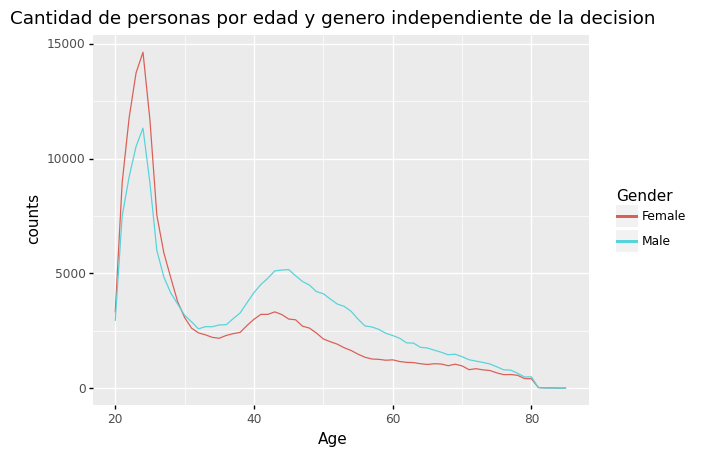

<ggplot: (130981635100)>

In [11]:
(p9.ggplot(data=GenderAge,
           mapping=p9.aes(x='Age', #Agregando valor a la columna x
                          y='counts', #Agregando valor a la columna y
                          color='Gender')) #Seleccionando la variable a comparar
    + p9.geom_line()
    +p9.labs(title='Cantidad de personas por edad y genero independiente de la decision')
)

In [12]:
AgeResponse = data1.groupby(['Age', 'Response'])['Response'].count() #Agrupando Response por edad
AgeResponse = AgeResponse.reset_index(name='counts') #Agregando campo counts
AgeResponse['Response'] = AgeResponse['Response'].replace(0,"No") #Reemplazando valor 0 por No
AgeResponse['Response'] = AgeResponse['Response'].replace(1,"Yes") #Reemplazando valor 1 por Si
AgeResponse

,Age,Response,counts
0,20,No,6061
1,20,Yes,171
2,21,No,15883
3,21,Yes,574
4,22,No,20201
...,...,...,...
125,82,Yes,1
126,83,No,21
127,83,Yes,1
128,84,No,11


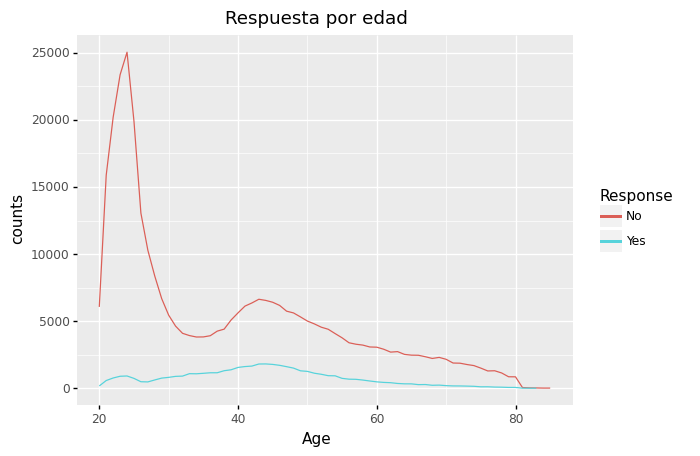

<ggplot: (130981793512)>

In [13]:
(p9.ggplot(data=AgeResponse,
           mapping=p9.aes(x='Age', #Agregando valor a la columna x
                          y = 'counts', #Agregando valor a la columna y
                          color='Response')) #Seleccionando la variable a comparar
    + p9.geom_line()
    +p9.labs(title='Respuesta por edad')
)

In [14]:
GenderResAge = data1.groupby(['Gender', 'Response','Age'])['Age'].count() #Agrupando age por Response y Gender
GenderResAge = GenderResAge.reset_index(name='counts') #Agregando campo counts
GenderResAge

,Gender,Response,Age,counts
0,Female,0,20,3221
1,Female,0,21,8706
2,Female,0,22,11390
3,Female,0,23,13304
4,Female,0,24,14223
...,...,...,...,...
253,Male,1,78,43
254,Male,1,79,32
255,Male,1,80,28
256,Male,1,81,1


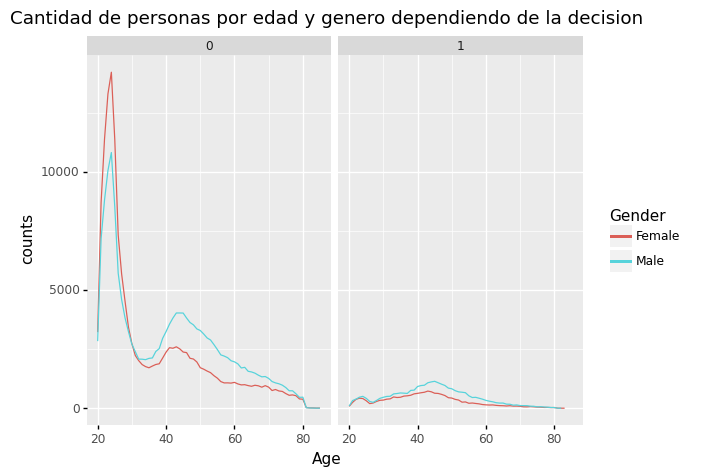

<ggplot: (130981736358)>

In [15]:
(p9.ggplot(data=GenderResAge,
           mapping=p9.aes(x='Age', #Agregando valor a la columna x
                          y= 'counts', #Agregando valor a la columna y
                          color='Gender')) #Seleccionando la variable a comparar
    + p9.geom_line()
    + p9.facet_wrap("Response")
    +p9.labs(title='Cantidad de personas por edad y genero dependiendo de la decision')
)

[Text(0.5, 1.0, 'Comparacion de aceptacion'),
 Text(0.5, 0, 'Aceptacion de seguro'),
 Text(0, 0.5, 'Numero personas')]

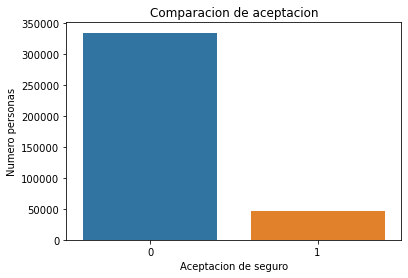

In [16]:
grafico= sns.countplot(x="Response", data=data1)
grafico.set(title = 'Comparacion de aceptacion',
           xlabel = 'Aceptacion de seguro', ylabel = 'Numero personas')

[Text(0.5, 1.0, 'Comparacion cantidad de hombres y mujeres'),
 Text(0.5, 0, 'Genero'),
 Text(0, 0.5, 'Numero personas')]

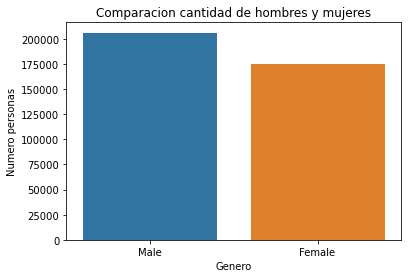

In [17]:
grafico= sns.countplot(x="Gender", data=data1)
grafico.set(title = 'Comparacion cantidad de hombres y mujeres',
           xlabel = 'Genero', ylabel = 'Numero personas')

[Text(0.5, 1.0, 'Aceptacion por genero'),
 Text(0.5, 0, 'Genero'),
 Text(0, 0.5, 'Numero personas')]

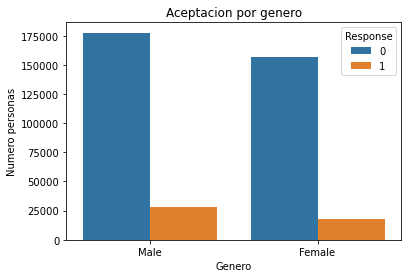

In [18]:
grafico = sns.countplot(x = 'Gender', hue = 'Response', data =data1)
grafico.set(title = 'Aceptacion por genero',
           xlabel = 'Genero', ylabel = 'Numero personas')

[Text(0.5, 1.0, 'Comparacion estado de vehiculo'),
 Text(0.5, 0, 'Vehiculo con daños'),
 Text(0, 0.5, 'Numero personas')]

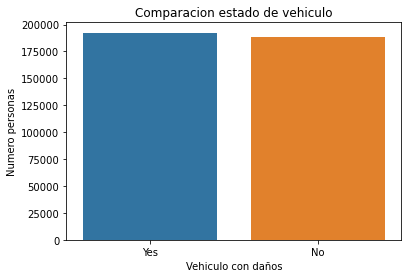

In [19]:
grafico= sns.countplot(x="Vehicle_Damage", data=data1)
grafico.set(title = 'Comparacion estado de vehiculo',
           xlabel = 'Vehiculo con daños', ylabel = 'Numero personas')

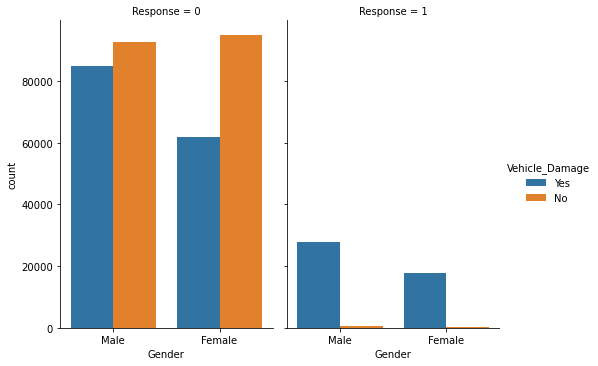

In [20]:
g = sns.catplot(x="Gender", hue="Vehicle_Damage", col="Response",
                data=data1, kind="count",
                height=5, aspect=.7);

#### La gran mayoria de la gente que accede a contratar un seguro ha sufrido daños en su vehiculo anteriormente


[Text(0.5, 1.0, 'Comparacion antiguedad del vehiculo'),
 Text(0.5, 0, 'Antiguedad'),
 Text(0, 0.5, 'Numero vehiculos')]

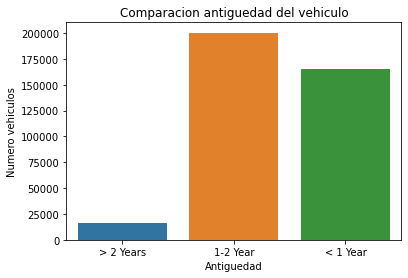

In [21]:
grafico= sns.countplot(x="Vehicle_Age", data=data1)
grafico.set(title = 'Comparacion antiguedad del vehiculo',
           xlabel = 'Antiguedad', ylabel = 'Numero vehiculos')

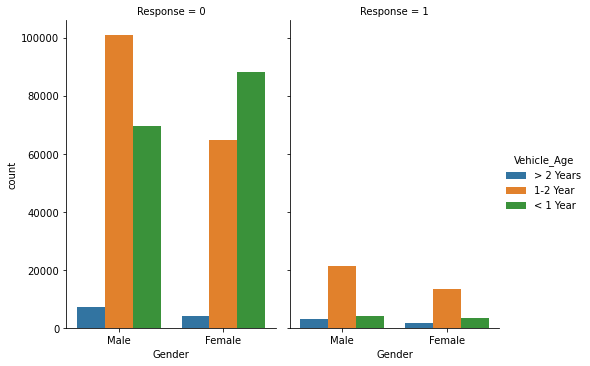

In [22]:
g = sns.catplot(x="Gender", hue="Vehicle_Age", col="Response",
                data=data1, kind="count",
                height=5, aspect=.7);

[Text(0.5, 1.0, 'Comparacion de aseguramiento previo'),
 Text(0.5, 0, 'Tiene seguro'),
 Text(0, 0.5, 'Numero personas')]

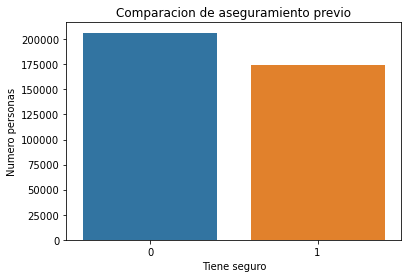

In [23]:
grafico= sns.countplot(x="Previously_Insured", data=data1)
grafico.set(title = 'Comparacion de aseguramiento previo',
           xlabel = 'Tiene seguro', ylabel = 'Numero personas')

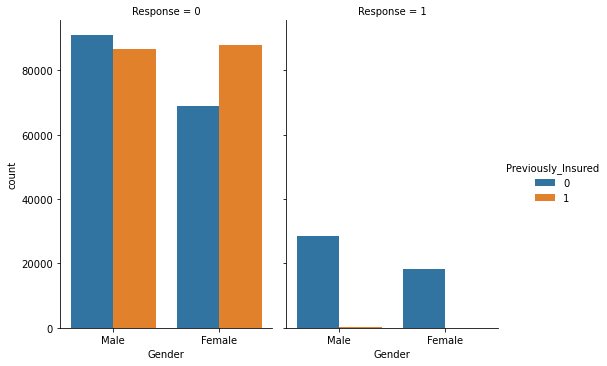

In [24]:
g = sns.catplot(x="Gender", hue="Previously_Insured", col="Response",
                data=data1, kind="count",
                height=5, aspect=.7);

In [25]:
data1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


RAMDOM FOREST
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)


MAQUINA SOPORTE VECTORES
from sklearn import svm
clf = svm.SVC()

In [26]:
data1['Gender'] = data1['Gender'].replace('Female',0) #Reemplazando String por int
data1['Gender'] = data1['Gender'].replace('Male',1) 

In [27]:
data1['Vehicle_Age'] = data1['Vehicle_Age'].replace('< 1 Year',0) #Reemplazando String por int
data1['Vehicle_Age'] = data1['Vehicle_Age'].replace('1-2 Year',1)
data1['Vehicle_Age'] = data1['Vehicle_Age'].replace('> 2 Years',2) 

In [28]:
data1['Vehicle_Damage'] = data1['Vehicle_Damage'].replace('No',0) #Reemplazando String por int
data1['Vehicle_Damage'] = data1['Vehicle_Damage'].replace('Yes',1)

# Random forest

In [29]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data1.drop(["Response"],axis = 1)

# y es nuestra variable dependiente
y = data1.Response

# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

### Calculando valor optimo de n_estimators

C:\Users\tumam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
C:\Users\tumam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
C:\Users\tumam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
C:\Users\tumam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
C:\Users\tumam\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used

Valor óptimo de n_estimators: 146


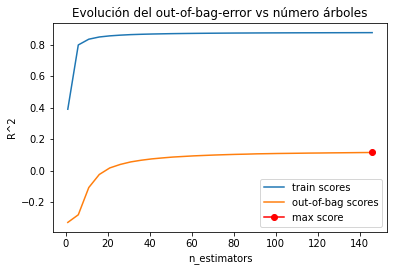

In [30]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

In [31]:
# Creaamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))
BA_model = RandomForestClassifier(n_estimators = 146, #numero de arboles
                                  random_state = 2016, #Semilla para que la aleatoridad se siga un orden.
                                  min_samples_leaf = 8,) #Nmero minimo de muestras en una hoja

In [32]:
BA_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=146, random_state=2016)

In [33]:
# Porcentaje de efectividad
BA_model.score(X_test, y_test)

0.8772119481937068

### Resultado de la prediccion

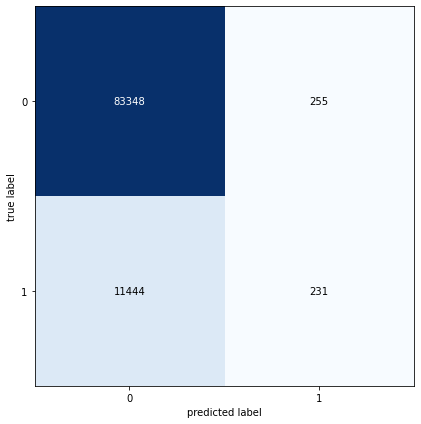

In [34]:


# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()